In [2]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('data/Amazon Sale Report.csv', on_bad_lines='skip', quotechar='"')

# Convert Date column to datetime
df['Date'] = pd.to_datetime(df['Date'], errors='coerce')

# Create CustomerType column for B2B vs Non-B2B
df['CustomerType'] = df['B2B'].apply(lambda x: 'B2B' if x else 'non-B2B')

C:\Users\Professional\AppData\Local\Temp\ipykernel_9456\42621238.py:1: DtypeWarning: Columns (23) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('data/Amazon Sale Report.csv', on_bad_lines='skip', quotechar='"')
C:\Users\Professional\AppData\Local\Temp\ipykernel_9456\42621238.py:4: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  df['Date'] = pd.to_datetime(df['Date'], errors='coerce')



Monthly Revenue Trend:
 Date
Mar      101683.85
Apr    28838708.32
May    26226476.75
Jun    23425809.38
Name: Amount, dtype: float64


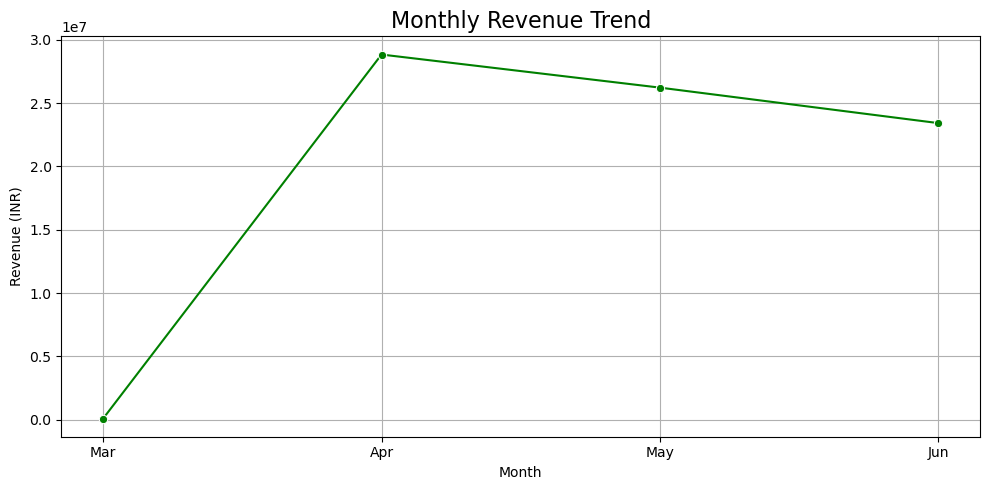

In [4]:
monthly_revenue = df.groupby(df['Date'].dt.month)['Amount'].sum().round(2)
monthly_revenue = monthly_revenue.sort_index()
month_map = {1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',
             7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
monthly_revenue.index = monthly_revenue.index.map(month_map)

print("\nMonthly Revenue Trend:\n", monthly_revenue)

plt.figure(figsize=(10,5))
sns.lineplot(x=monthly_revenue.index, y=monthly_revenue.values, marker='o', color='green')
plt.title('Monthly Revenue Trend', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Revenue (INR)')
plt.grid(True)
plt.tight_layout()
plt.show()



Top Categories Revenue:
 Category
Set              39204124.03
kurta            21299546.70
Western Dress    11216072.69
Top               5347792.30
Ethnic Dress       791217.66
Other              733924.92
Name: Amount, dtype: float64


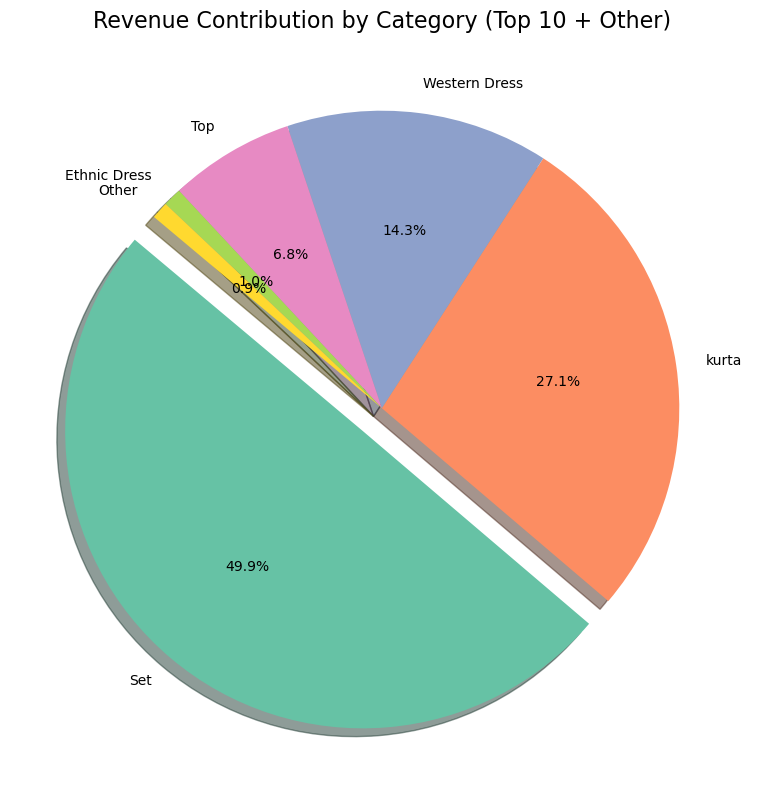

In [6]:

category_revenue = df.groupby('Category')['Amount'].sum().sort_values(ascending=False)
top_n = 5
top_categories = category_revenue.head(top_n)
other_sum = category_revenue[top_n:].sum()
top_categories['Other'] = other_sum

print("\nTop Categories Revenue:\n", top_categories)

plt.figure(figsize=(8,8))
colors = sns.color_palette('Set2', len(top_categories))
explode = [0.1 if i == 0 else 0 for i in range(len(top_categories))]

plt.pie(top_categories, labels=top_categories.index, autopct='%1.1f%%', 
        startangle=140, colors=colors, explode=explode, shadow=True)
plt.title('Revenue Contribution by Category (Top 10 + Other)', fontsize=16)
plt.tight_layout()
plt.show()



Top 10 SKUs by Avg Order Value:
 SKU
J0238-LCD-S       2458.820000
J0238-LCD-XS      2442.000000
J0238-LCD-L       2327.250000
J0238-LCD-XXXL    1985.000000
J0238-LCD-XL      1960.666667
J0228-SKD-XXXL    1695.100000
J0011-LCD-A-L     1695.000000
J0228-SKD-L       1694.500000
J0228-SKD-XXL     1681.333333
J0011-LCD-XXL     1673.750000
Name: Amount, dtype: float64


C:\Users\Professional\AppData\Local\Temp\ipykernel_9456\3995918358.py:5: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=top_skus.values, y=top_skus.index, palette='magma')


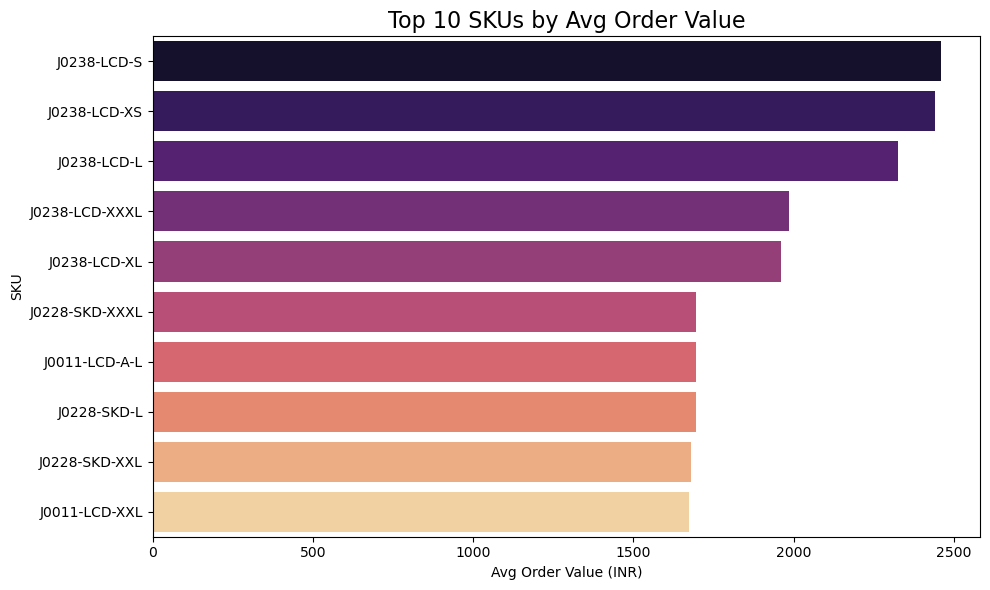

In [7]:

top_skus = df.groupby('SKU')['Amount'].mean().sort_values(ascending=False).head(10)
print("\nTop 10 SKUs by Avg Order Value:\n", top_skus)

plt.figure(figsize=(10,6))
sns.barplot(x=top_skus.values, y=top_skus.index, palette='magma')
plt.title('Top 10 SKUs by Avg Order Value', fontsize=16)
plt.xlabel('Avg Order Value (INR)')
plt.ylabel('SKU')
plt.tight_layout()
plt.show()


B2B vs Non-B2B Monthly Revenue:
 CustomerType        B2B      non-B2B
Date                                
Mar                0.00    101683.85
Apr           234514.86  28604193.46
May           188158.64  26038318.11
Jun           168547.29  23257262.09


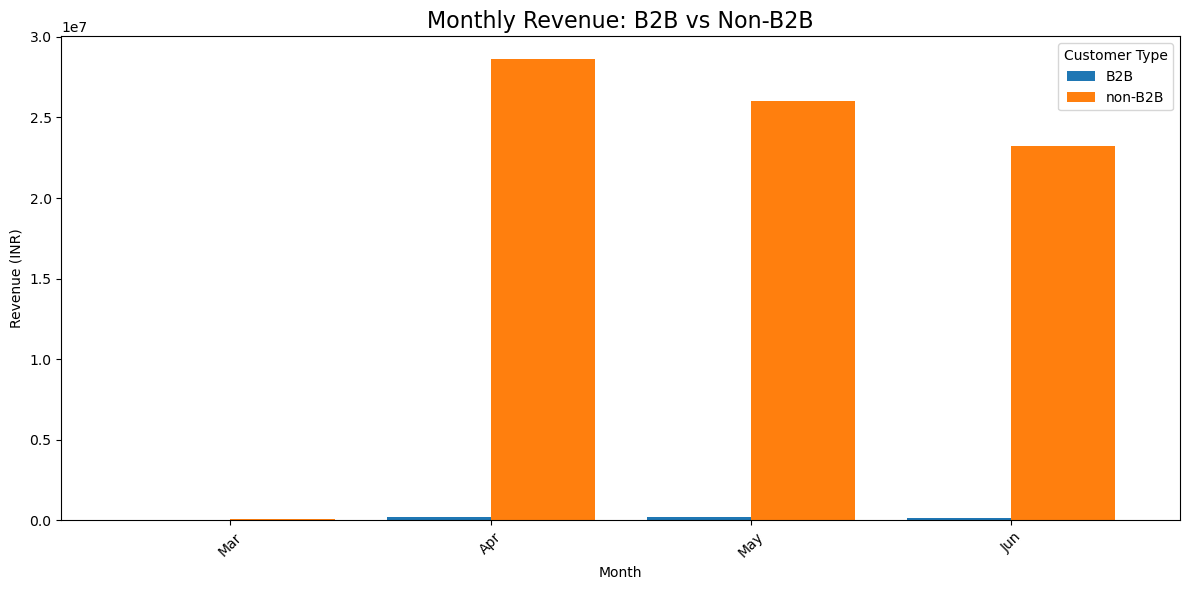

In [8]:

b2b_monthly = df.groupby([df['Date'].dt.month, 'CustomerType'])['Amount'].sum().unstack().fillna(0)
b2b_monthly.index = b2b_monthly.index.map(month_map)

print("\nB2B vs Non-B2B Monthly Revenue:\n", b2b_monthly)

b2b_monthly.plot(kind='bar', figsize=(12,6), width=0.8)
plt.title('Monthly Revenue: B2B vs Non-B2B', fontsize=16)
plt.xlabel('Month')
plt.ylabel('Revenue (INR)')
plt.xticks(rotation=45)
plt.legend(title='Customer Type')
plt.tight_layout()
plt.show()
